In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd

In [3]:
data=pd.read_csv('clean2(1).data')

# Descripción del Data Set

El data set es un conjunto de datos que describen si un elemento es o no un 'Musk' teniendo un total de 169 atributos donde los dos primeros indican el nombre numérico y cualitativo del elemento, y el último atributo es un 1 o un 0 según si el elemento es un Musk.

In [4]:
data.keys()

Index(['MUSK-211', '211_1+1', '46', '-108', '-60', '-69', '-117', '49', '38',
       '-161',
       ...
       '-308.1', '52', '-7', '39', '126', '156', '-50.1', '-112', '96', '1.'],
      dtype='object', length=169)

In [5]:
Y = data['1.']

In [6]:
data = data.drop('1.',axis=1)
data = data.drop('MUSK-211',axis=1)
data = data.drop('211_1+1',axis=1)

In [8]:
predictors=data.keys()
n = len(data[predictors])
X = np.array(data[predictors]).reshape((n, -1))

In [9]:
print(np.shape(X),np.shape(Y))

(6597, 166) (6597,)


In [10]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
C=np.logspace(0,-4,100)
f1=[]
for i in C:
    clf = LogisticRegression(C=i, penalty='l1', solver='saga', tol=0.1)
    clf.fit(x_train, y_train)
    f1.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='macro'))

In [45]:
f1_2=[]
for i in C:
    clf = LogisticRegression(C=i, penalty='l2', solver='saga', tol=0.1)
    clf.fit(x_train, y_train)
    f1_2.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='macro'))

Text(0, 0.5, 'f1 score')

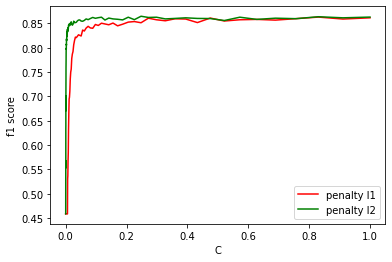

In [47]:
plt.plot(C,f1,color='r',label='penalty l1')
plt.plot(C,f1_2,color='green',label='penalty l2')
plt.legend(loc=0.0)
plt.xlabel('C')
plt.ylabel('f1 score')